# Fortnite Heart Rate (HR) and Heart Rate Variability (HRV) Analysis

### Introduction

Fortnite is a free game created by Epic Games that has a 100-player PvP mode. This mode is essentially last man standing. As the number of players alive in the game decrease, nerves and fear tend to build up (unless you're a pro at this game and know what you're doing). I intend on measuring this fear via a heart rate monitor through two features - heart rate (HR) and heart rate variability (HRV).

#### Heart Rate Sensor

The Polar H7 is a Heart Rate Sensor (chest strap) that uses Bluetooth Low Energy (BLE) for communication. It is a strap that contains two electrodes, allowing it to measure the electrical activity of the heart to deliver continuous heart rate data.

#### Bluetooth Low Energy

The Python BLE Wrapper noted in the README is used to receive the Bluetooth packets. BLE contains GATT (Generic Attribute) Services which are collections of characteristics that encapsulate the behavior of part of a device. Each characteristic contains value fields.

In our case, the **Heart Rate (0x180D)** service is used, which contains multiple characteristics such as *Heart Rate Measurement*, *Body Sensor Location* and *Heart Rate Control Point*. Of interest to us is the **Heart Rate Measurement** characteristic which holds the wanted value fields **Heart Rate Value** and **RR-Interval**. 

The packets are received and decoded as shown below (every second):
![](img/hrpacket.png "Bluetooth Packet for Heart Rate Measurement")

#### Heart Rate (HR) and RR Intervals

HR is the average number of beats per minute (bpm). It doesn't require exact timings to each heart beat. For example, 60 bpm could mean 1 beat per second, or an average of 1 beat every 0.5s, 1.5s, 0.5s, 1.5s, ... and so on.

RR intervals are the time difference between each successive heart beat. The image below shows a QRS complex (the ECG waveform that corresponds to the contraction of the ventricles), where an RR interval is shown as the interval between successive R peaks. RR intervals are useful because they allow us to calculate Heart Rate Variability (HRV) measures.

![](img/rrinterval.png "RR Interval")

#### Heart Rate Variability (HRV)

Heart Rate Variability measures the changes in time between successive heart beats, where this time is normally measured in millseconds (ms) and is called the RR interval. A lower HRV tends to indicate stress from psychological events, exercise or other stressors. A higher HRV usually means that the body is healthy and has a strong ability to tolerate stress or recovers well from prior accumulated stress.

There are time-domain and frequency-domain measures that exist to calculate HRV. Some of these calculations allow us to gain an insight and measure the functioning of the Autonomic Nervous System (ANS). The ANS has two branches; sympathetic (SNS) and parasympathetic (PNS). The former mobilises the body’s resources for action under stressful conditions. In contrast, the latter relaxes the body and stabilises the body into a steady state.

### Collected Data

There are a few collected data files existing that contain the HR and RR intervals for different Fortnite games. These can be loaded in and analysed.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

from os import listdir
from os.path import isfile, join

In [16]:
def create_new_fig():
    """ Creates new figure

        :returns:
            An axis object
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    return ax

def plot_hr_signal(hrs):
    """ Plots HR signal

        :returns:
            Plot
    """
    ax = create_new_fig()
    timescale = np.linspace(0, len(hrs), len(hrs))
    plt.title("Heart Rate (HR) Signal")
    ax.plot(timescale, hrs, label="HR", color='blue')
    ax.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("HR (bpm)")
    # Draw plot so that it doesn't block computation (show needs to follow at end of computation)
    plt.show()

In [28]:
# Data file strings
data_file_strings = [f for f in listdir("data") if isfile(join("data", f))]
hr_files = [s for s in data_file_strings if "hr" in s]
rr_files = [s for s in data_file_strings if "rr" in s]

#### Fortnite Game 1

Went straight to Tilted Towers. Average HR is around 80 ish. Got to last 12 people, then there was a fight off with 3 other people to which it became pretty tense (reaching around ~120 heart rate)!

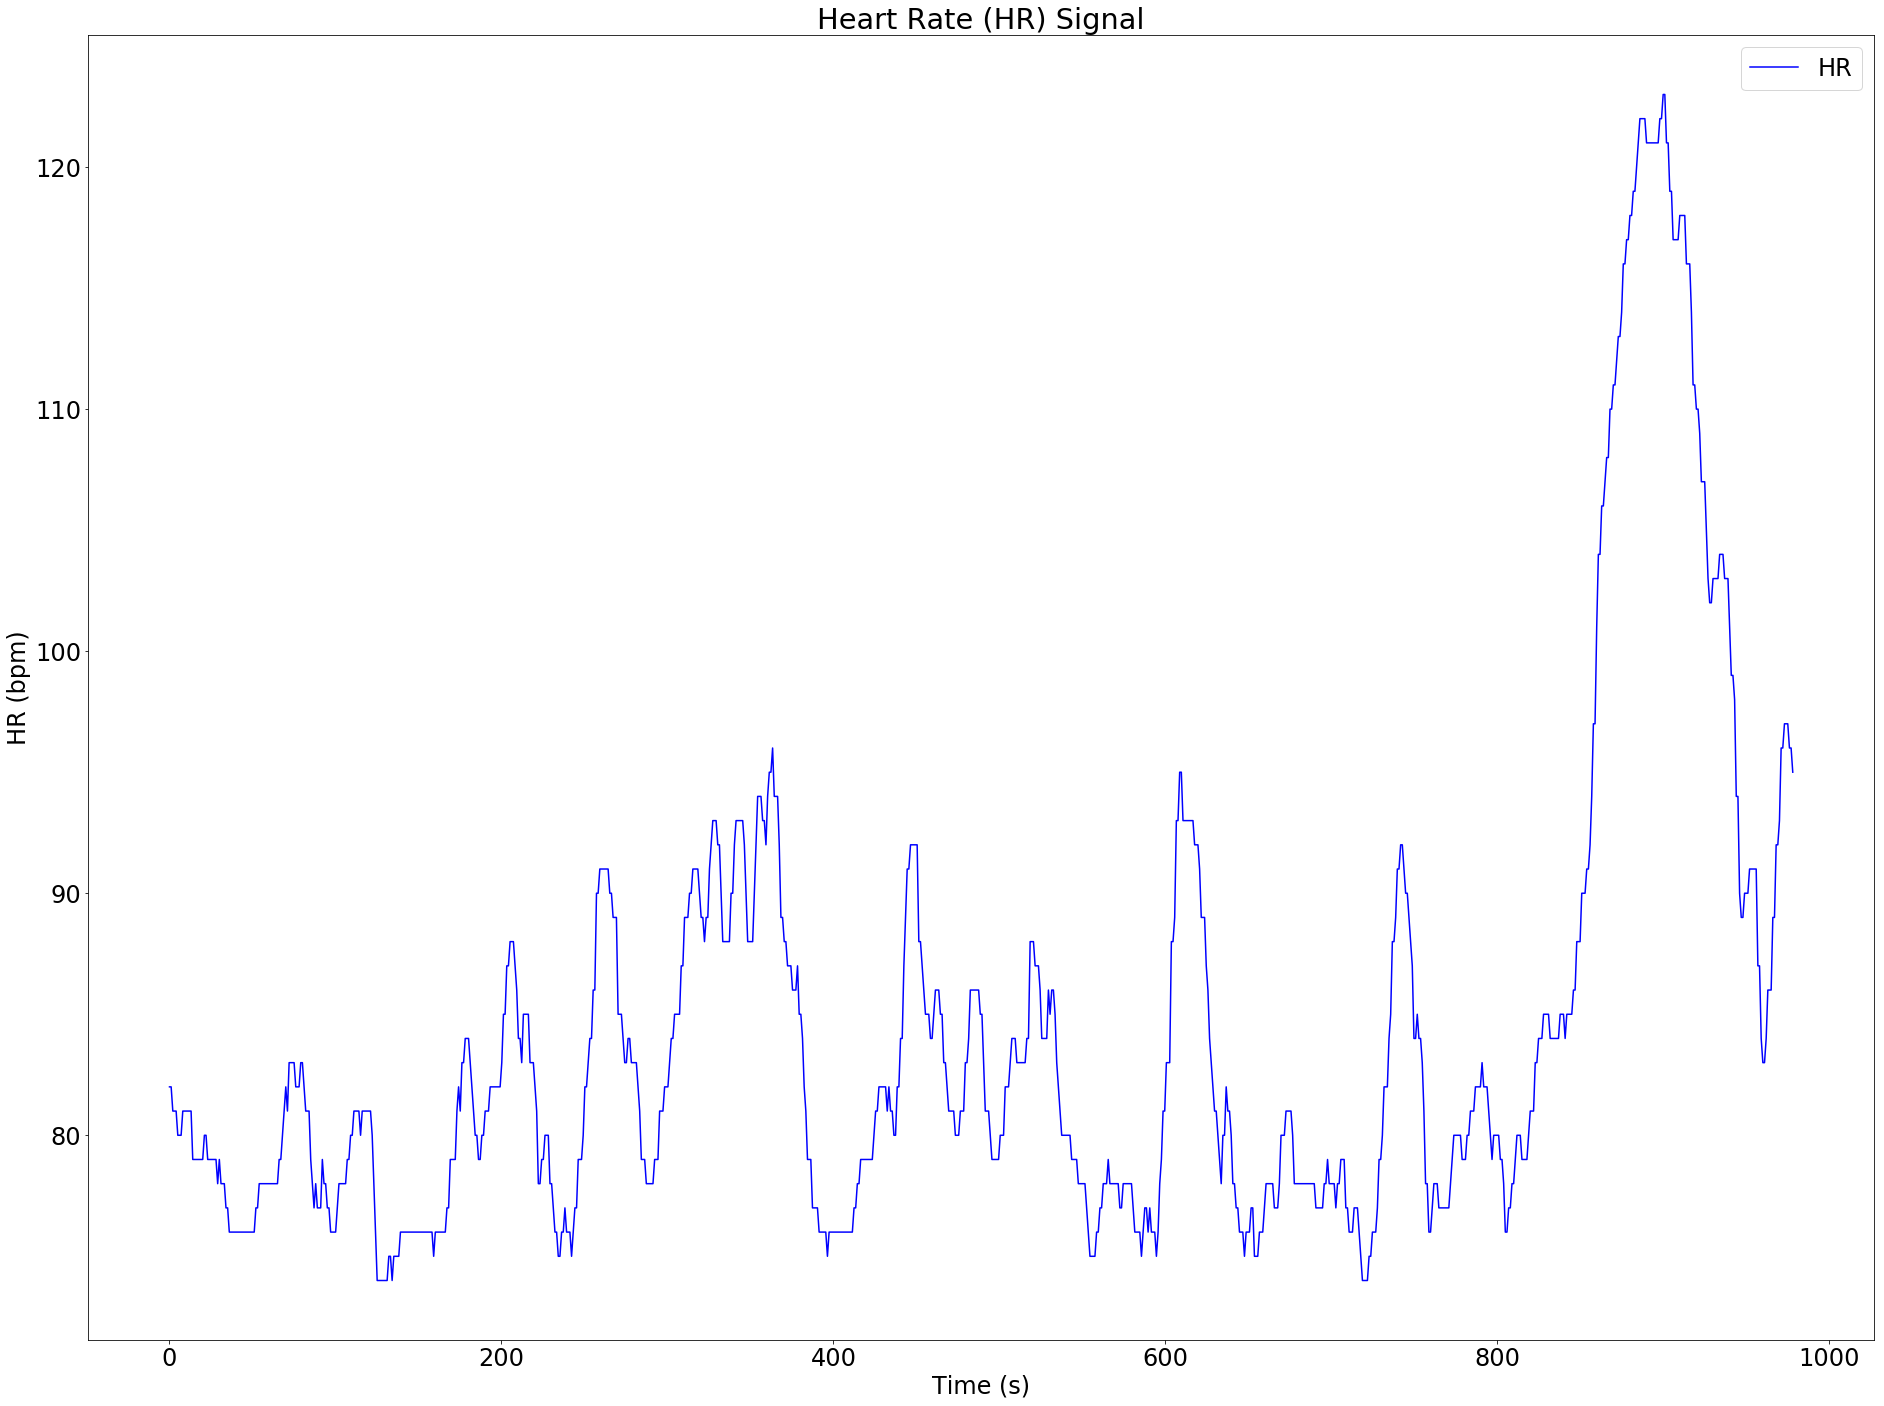

In [29]:
# Heart Rate Signal for Fortnite game when I came 12th overall
f_hr = open("data/" + hr_files[2], 'r')
hrs = [int(hr.rstrip()) for hr in f_hr.readlines()]
f_hr.close()
    
plot_hr_signal(hrs) 